# ML Project 17

`mail_spam` isimli veri seti üzerinde çalışıyorum. Bu veri setinin ham halinde sadece 2 sütun bulunmakta. Bu sütunlar, mail metninin olduğu `Message` sütunu ve mailin spam olup olmadığını gösteren `Category` sütunu var. Bu veri setiyle uğraşırken daha çok youtube üzerinden destek alarak gideceğim. Proje 4'te NLP ile uğraştım ancak burada da aynı şeylerin mi yapılması gerekiyor tam bilemiyorum. O yüzden dediğim gibi, destek alarak gideceğim 

## Importing Libraries and Data 

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#Model 
#Değerlendirme metrikleri

In [3]:
project_17 = pd.read_csv("mail_data.csv")

In [4]:
project_17

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Analysing and Visualizing Data 

In [5]:
project_17.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


### .info()

In [6]:
project_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### .unique() and changing labels with '1' and '0'

In [7]:
project_17["Category"].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
project_17["Category"] = project_17["Category"].replace({"ham": 1, "spam": 0})

C:\Users\ogulc\AppData\Local\Temp\ipykernel_13040\1549900693.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  project_17["Category"] = project_17["Category"].replace({"ham": 1, "spam": 0})


In [9]:
project_17.head(3)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


### .duplicated() and .drop_duplicates()

In [10]:
project_17.duplicated().sum()

np.int64(415)

In [11]:
project_17[project_17.duplicated()]

,Category,Message
103,1,As per your request 'Melle Melle (Oru Minnamin...
154,1,As per your request 'Melle Melle (Oru Minnamin...
207,1,"As I entered my cabin my PA said, '' Happy B'd..."
223,1,"Sorry, I'll call later"
326,1,No calls..messages..missed calls
...,...,...
5524,0,You are awarded a SiPix Digital Camera! call 0...
5535,1,"I know you are thinkin malaria. But relax, chi..."
5539,1,Just sleeping..and surfing
5553,1,Hahaha..use your brain dear


In [12]:
project_17 = project_17.drop_duplicates()

In [13]:
project_17.shape

(5157, 2)

### .value_counts()

In [14]:
project_17["Category"].replace({0: "spam", 1: "ham"}).value_counts()

Category
ham     4516
spam     641
Name: count, dtype: int64

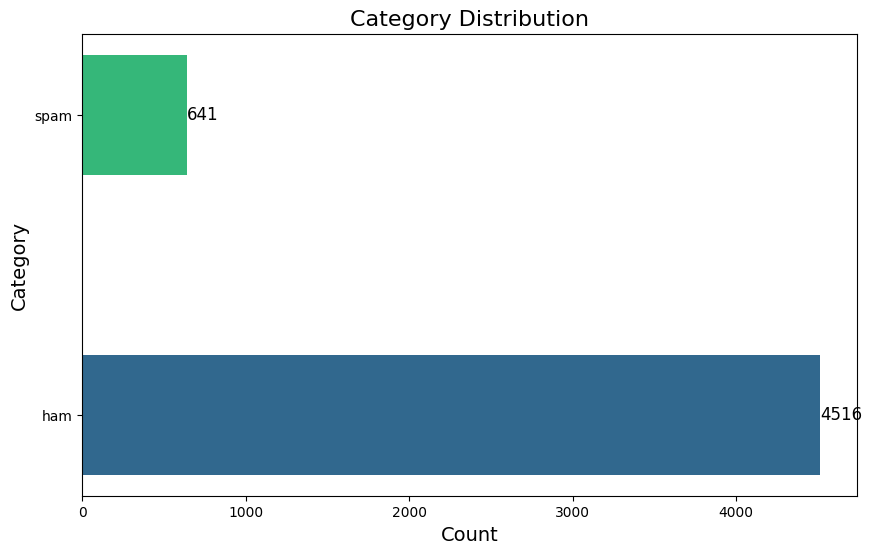

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# project_16["Gender"].value_counts() ifadesini bir değişkene atayalım
category_counts = project_17["Category"].replace({0: "spam", 1: "ham"}).value_counts()

# Barplot oluşturmak için Matplotlib'i kullanıyoruz
plt.figure(figsize=(10, 6))
bars = plt.barh(category_counts.index, category_counts.values, color=sns.color_palette('viridis', len(category_counts)), height=0.4)

# Barların üzerine sayıları ekleyelim
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, int(width), va='center', fontsize=12)

# Grafik başlığı ve eksen etiketlerini ekleyelim
plt.title('Category Distribution', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Grafiği gösterelim
plt.show()

+ Veri setinin dağılımında dengesizlik mevcut. İlerleyen aşamalarda bunun için `oversampling` veya `undersampling` kullanmayı düşünüyorum 

### .isnull().sum()

In [16]:
project_17.isnull().sum()

Category    0
Message     0
dtype: int64

## Separating Data and Vectorized Data without `stopwords`, `PorterStemmer`

+ Burada **stopwords** ve **PorterStemmer** kullanmadan direkt olarak **TFidfVectorizer** kullanarak metinleri vektöre çevireceğim. Ama buradan sonra bu iki tekniği yeni bir başlık altında kullandığım versiyonunu yapacağım 

### separating

In [18]:
X = project_17["Message"]
y = project_17["Category"]

In [19]:
X.head(2)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: Message, dtype: object

In [20]:
y.head(2)

0    1
1    1
Name: Category, dtype: int64

### TFidfVectorizer (Kelimeleri Ağırlıklandırarak Sayısal bir Vektör Oluşturma)

In [32]:
vectorizer_1 = TfidfVectorizer()

In [33]:
vectorizer_1.fit(X)

TfidfVectorizer()

In [34]:
#_uc = uncleaned olduğunu düşünelim
X_vectorized_uc = vectorizer_1.transform(X)

In [35]:
print(X_vectorized_uc)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 67934 stored elements and shape (5157, 8709)>
  Coords	Values
  (0, 1079)	0.3254824637577375
  (0, 1313)	0.24682163289537062
  (0, 1761)	0.3105790823420053
  (0, 1763)	0.27452746613871426
  (0, 2057)	0.27452746613871426
  (0, 2334)	0.25142216206874096
  (0, 3567)	0.14728383239686252
  (0, 3611)	0.15221254465391035
  (0, 3651)	0.18169112440169724
  (0, 4110)	0.10777814259403067
  (0, 4370)	0.3254824637577375
  (0, 4497)	0.27452746613871426
  (0, 5567)	0.1580989753178226
  (0, 5954)	0.25395808207313836
  (0, 7690)	0.1558478886324521
  (0, 8080)	0.22848058326362672
  (0, 8320)	0.18206053717134293
  (0, 8544)	0.22981732189151768
  (1, 4338)	0.5234057786973465
  (1, 4533)	0.40693812451964195
  (1, 5534)	0.27641681599588036
  (1, 5563)	0.5465710490257072
  (1, 8446)	0.43046670700566175
  (2, 77)	0.2326951819115437
  (2, 401)	0.22204039882555796
  :	:
  (5155, 1790)	0.13632832358826047
  (5155, 1798)	0.2821514894405624
  (5155, 260

### Splitting Data 

In [44]:
X_train_uc, X_test_uc, y_train_uc, y_test_uc = train_test_split(X_vectorized_uc, y, test_size = 0.2, random_state = 42)

In [45]:
print(X_vectorized_uc.shape, X_train_uc.shape, X_test_uc.shape)

(5157, 8709) (4125, 8709) (1032, 8709)


In [46]:
print(y.shape, y_train_uc.shape, y_test_uc.shape)

(5157,) (4125,) (1032,)


### DummyClassifier

In [47]:
from sklearn.dummy import DummyClassifier
dummy_1 = DummyClassifier(strategy = "most_frequent").fit(X_train_uc, y_train_uc)

In [50]:
print("DummyClassifer_1'in Test Setindeki Skoru", dummy_1.score(X_test_uc, y_test_uc))

DummyClassifer_1'in Test Setindeki Skoru 0.8682170542635659


+ Buraya kadar şu işlemler yaptık: `Message` sütununa **stopwords** temizliği vs. yapmadan **TfidfVectorizer** uyguladık ve metinleri sayısal vektörlere dönüştürdük. Daha sonra verileri Train ve Test olarak ayırdık. Ardından bu işlemde de DummyClassifer kullanarak veri setindeki dengesizliği hesapladık ve **0.86** gibi büyük bir sayı çıktı. Bu yüzden **Oversampling** uygulayarak bu durumdan kurtulmaya çalışacağız

### Oversampling 

**1. TfidfVectorizer ve Özellik Uzayı**

+ TfidfVectorizer kullanarak metin verisini sayısal bir formata dönüştürdüğünüzde, her bir kelime için bir TF-IDF değeri elde edersiniz. Bu özellikler artık sayısal hale geldiği için, normalde sayısal verilere uyguladığınız oversampling teknikleri (SMOTE, ADASYN, vb.) uygulanabilir hale gelir.
  
**2. Oversampling Yöntemleri**

+ SMOTE (Synthetic Minority Over-sampling Technique): Sayısal özellikler üzerinde yeni örnekler oluşturmak için en yaygın kullanılan yöntemlerden biridir. TF-IDF özellik uzayında bu yöntem uygulanabilir, ancak dikkat edilmesi gereken nokta, SMOTE gibi yöntemlerin genellikle yakın komşular arasındaki ortalamalar üzerinden yeni örnekler oluşturmasıdır. Bu, TF-IDF gibi seyrek matrislerle çalışırken beklenmedik sonuçlar doğurabilir.
Random Oversampling: Bu yöntem, azınlık sınıfındaki örnekleri rastgele seçerek veri setine ekler. TF-IDF vektörleri üzerinde çalışırken bu yöntem daha güvenli olabilir, çünkü mevcut TF-IDF vektörlerini doğrudan kopyalar.

**3. Dikkat Edilmesi Gerekenler**

+ Veri Yoğunluğu (Sparseness): TF-IDF vektörleri genellikle çok sayıda sıfır içeren seyrek matrislerdir. SMOTE gibi yöntemler bu seyrekliği bozabilir ve anlamsız ara değerler oluşturabilir. Bu nedenle, bu yöntemi kullanırken dikkatli olunmalı ve gerekirse farklı yaklaşımlar denenmelidir.
Doğrulama: Oversampling sonrası modelin performansını doğrulamak için dikkatli bir şekilde çapraz doğrulama (cross-validation) yapılmalıdır. Bu, özellikle metin verilerinde özelliklerin yüksek boyutluluğu ve seyrekliği nedeniyle önemlidir.

In [38]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)

In [51]:
X_resample_1, y_resample_1 = ros.fit_resample(X_train_uc, y_train_uc)

In [54]:
print("X:", X.shape, "X_vectorized_uc", X_vectorized_uc.shape, "X_train_uc", X_train_uc.shape, "X_resample_1", X_resample_1.shape)

X: (5157,) X_vectorized_uc (5157, 8709) X_train_uc (4125, 8709) X_resample_1 (7240, 8709)


In [55]:
dummy_rsmpl = DummyClassifier(strategy = "most_frequent").fit(X_resample_1, y_resample_1)

In [56]:
print("Resample ile Eğitilmiş DummyClassifier'ın Test Setindeki Skoru:", dummy_rsmpl.score(X_test_uc, y_test_uc))

Resample ile Eğitilmiş DummyClassifier'ın Test Setindeki Skoru: 0.13178294573643412


+ Kullanacağımız veri setleri özetle; `X_resample_1`, `y_resample_1`, `X_test_uc` ve `y_test_uc`'dir. 

### Fitting and Evaluating Model(s)

Sadece Lojistik Regresyon modelini deneyeceğim

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [59]:
lr = LogisticRegression()
lr.fit(X_resample_1, y_resample_1)

LogisticRegression()

In [68]:
lr_pred = lr.predict(X_test_uc)
print("Logistic Regression'un Train setindeki skoru:", lr.score(X_resample_1, y_resample_1))
print("Logistic Regression'un Test setindeki skoru:", accuracy_score(y_test_uc, lr_pred))
print("Logistic Regression'un Precision skoru:", precision_score(y_test_uc, lr_pred))
print("Logistic Regression'un Recall skoru:", recall_score(y_test_uc, lr_pred))
print("Logistic Regression'un F1 skoru:", f1_score(y_test_uc, lr_pred))
print("Logistic Regression'un Roc Auc skoru:", roc_auc_score(y_test_uc, lr_pred), "\n")

Logistic Regression'un Train setindeki skoru: 0.9954419889502762
Logistic Regression'un Test setindeki skoru: 0.9777131782945736
Logistic Regression'un Precision skoru: 0.9932203389830508
Logistic Regression'un Recall skoru: 0.9810267857142857
Logistic Regression'un F1 skoru: 0.987085906793936
Logistic Regression'un Roc Auc skoru: 0.9684545693277311 



In [70]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr, X_vectorized_uc, y)
print("Her modeldeki doğruluk oranı:", cv_scores)
print("\nModellerin doğruluk oranlarının ortalaması:", cv_scores.mean())

Her modeldeki doğruluk oranı: [0.96027132 0.94573643 0.95732299 0.95829292 0.95053346]

Modellerin doğruluk oranlarının ortalaması: 0.9544314242964231


## Separating Data and Vectorized Data with ``stopwords``, ``PorterStemmer``

In [73]:
project_17.head(3)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [74]:
#_c'yi 'clean' olarak düşünelim
project_c = project_17

### stopwords (Anlamlı bilgi taşımayan kelimeleri indirme (Bunlar daha sonra çıkarılmak için kullanılacak))

In [71]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'haven', 'because', 'have', 'am', 'an', 't', 'while', "you'll", 'your', 'themselves', 'which', 'shan', 'her', 'did', 'both', 'needn', 'own', 'yours', 'to', 'mightn', 'for', 've', 'but', 'with', 'most', 'd', 'we', 'over', 'so', 'very', 'into', 'was', 'now', "shan't", 'were', 'o', 'aren', "doesn't", 'has', 'having', 'doing', 'ours', "weren't", 'after', 'you', "it's", 'than', "that'll", "mustn't", 'doesn', "should've", 'are', 'in', 'under', "wouldn't", 'yourselves', "couldn't", "hasn't", 'mustn', 'further', 's', 'or', 'shouldn', 'the', "don't", 'couldn', 'above', 'off', 'nor', 'not', "wasn't", 'is', "isn't", 'should', 'just', 'wasn', "you've", 'me', 'those', 'too', 'more', 'before', 'can', 'hers', 'been', 'between', 'up', 'some', 'as', 'when', 'down', 'there', "you're", "won't", 'whom', 'being', 'where', 'they', 'same', 'his', 'once', 'do', 'it', 'he', 'at', 'be', 'himself', 'what', 'herself', 'ourselves', 'y', 'by', 'theirs', 'then', 'that', 'out', 'll', 'a', 'i', 'who', "she's", 'ain',

+ Buradaki `stopwords`'leri istersek direkt olarak `Message` sütunundan atabiliriz. Ancak `TfidfVectorizer(stop_words = "english")` dersek de bu sözcükler dikkate alınmayacaktır.

### PorterStemmer (Kelimeleri Köklerine İndirgeme)

In [72]:
from nltk.stem.porter import PorterStemmer
port_stem = PorterStemmer()
# Stemming fonksiyonu
def stemming(content):
    if isinstance(content, str):
        # Harfler ve boşluk dışındaki karakterleri kaldır
        stemmed_content = re.sub("[^a-zA-Z\s]", " ", content)
        # Metni küçük harfe çevir
        stemmed_content = stemmed_content.lower()
        # Metni kelimelere ayır
        stemmed_content = stemmed_content.split()
        # Durak kelimeleri çıkar ve köklerine indir
        stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stop_words]
        # Kelimeleri tekrar birleştir
        stemmed_content = " ".join(stemmed_content)
        return stemmed_content
    return content

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ogulc\AppData\Local\Temp\ipykernel_13040\3834036647.py:7: SyntaxWarning: invalid escape sequence '\s'
  stemmed_content = re.sub("[^a-zA-Z\s]", " ", content)


In [75]:
project_c["Message"] = project_c["Message"].apply(stemming)

C:\Users\ogulc\AppData\Local\Temp\ipykernel_13040\3322496261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  project_c["Message"] = project_c["Message"].apply(stemming)


In [77]:
project_c.head(3)

,Category,Message
0,1,go jurong point crazi avail bugi n great world...
1,1,ok lar joke wif u oni
2,0,free entri wkli comp win fa cup final tkt st m...


### Separating Data

In [78]:
X_c = project_c["Message"]
y_c = project_c["Category"]

In [79]:
X_c.head(3)

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
Name: Message, dtype: object

In [80]:
y_c.head(3)

0    1
1    1
2    0
Name: Category, dtype: int64

### TfidfVectorizer

In [84]:
vectorizer_2 = TfidfVectorizer(min_df = 1, stop_words = "english", lowercase = True)

In [85]:
vectorizer_2.fit(X_c)

TfidfVectorizer(stop_words='english')

In [87]:
X_vectorized_c = vectorizer_2.transform(X_c)

In [88]:
print(X_vectorized_c)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 36522 stored elements and shape (5157, 6166)>
  Coords	Values
  (0, 181)	0.3547365643120326
  (0, 365)	0.269005761601828
  (0, 716)	0.33849367903025085
  (0, 718)	0.2992017727253679
  (0, 940)	0.2992017727253679
  (0, 1142)	0.27401978261585525
  (0, 2154)	0.16571404588557004
  (0, 2191)	0.19802137568990918
  (0, 2767)	0.3547365643120326
  (0, 2871)	0.2864445531306947
  (0, 4003)	0.2424342720555806
  (0, 5841)	0.1960668473627221
  (0, 6008)	0.24761047905717112
  (1, 2734)	0.4802147127767624
  (1, 2899)	0.4189098220696647
  (1, 3680)	0.28454871202491233
  (1, 3704)	0.5626506023884166
  (1, 5932)	0.44313059104874386
  (2, 249)	0.1874973328886135
  (2, 1033)	0.21809977326710633
  (2, 1193)	0.22422057470800605
  (2, 1636)	0.39972943247774007
  (2, 1750)	0.5401950457805094
  (2, 1847)	0.18853138853818086
  (2, 1958)	0.12932840737814072
  :	:
  (5152, 3478)	0.33198951060115944
  (5152, 3489)	0.31316404711946355
  (5152, 4049)	0.318

### Splitting Data 

In [89]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_vectorized_c, y_c, test_size = 0.2, random_state = 42)

In [90]:
print(X_c.shape, X_train_c.shape, X_test_c.shape)

(5157,) (4125, 6166) (1032, 6166)


In [91]:
print(y_c.shape, y_train_c.shape, y_test_c.shape)

(5157,) (4125,) (1032,)


### DummyClassifier

In [92]:
from sklearn.dummy import DummyClassifier
dummy_2 = DummyClassifier(strategy = "most_frequent").fit(X_train_c, y_train_c)

In [93]:
print("DummyClassifer_2'in Test Setindeki Skoru", dummy_2.score(X_test_uc, y_test_uc))

DummyClassifer_2'in Test Setindeki Skoru 0.8682170542635659


+ Aynı yukarıdaki gibi `dummy_2`'nin de Test setindeki skoru yüksek çıktı. Bu yüzden bu veri seti için **oversampling** uygulayacağım

### Oversampling

In [95]:
from imblearn.over_sampling import RandomOverSampler
ros_2 = RandomOverSampler(random_state = 42)

In [96]:
X_resample_2, y_resample_2 = ros.fit_resample(X_train_c, y_train_c)

In [97]:
print("X:", X_c.shape, "X_vectorized_uc", X_vectorized_c.shape, "X_train_uc", X_train_c.shape, "X_resample_1", X_resample_2.shape)

X: (5157,) X_vectorized_uc (5157, 6166) X_train_uc (4125, 6166) X_resample_1 (7240, 6166)


In [98]:
dummy_rsmpl_2 = DummyClassifier(strategy = "most_frequent").fit(X_resample_2, y_resample_2)

In [99]:
print("Resample ile Eğitilmiş DummyClassifier'ın Test Setindeki Skoru:", dummy_rsmpl_2.score(X_test_c, y_test_c))

Resample ile Eğitilmiş DummyClassifier'ın Test Setindeki Skoru: 0.13178294573643412


+ Gördüğün gibi, oversampling işe yaradı

### Fitting and Evaluating Model 

In [101]:
lr_2= LogisticRegression()
lr_2.fit(X_resample_2, y_resample_2)

LogisticRegression()

In [103]:
lr_pred_2 = lr_2.predict(X_test_c)
print("Logistic Regression'un Train setindeki skoru:", lr_2.score(X_resample_2, y_resample_2))
print("Logistic Regression'un Test setindeki skoru:", accuracy_score(y_test_c, lr_pred_2))
print("Logistic Regression'un Precision skoru:", precision_score(y_test_c, lr_pred_2))
print("Logistic Regression'un Recall skoru:", recall_score(y_test_c, lr_pred_2))
print("Logistic Regression'un F1 skoru:", f1_score(y_test_c, lr_pred_2))
print("Logistic Regression'un Roc Auc skoru:", roc_auc_score(y_test_c, lr_pred_2), "\n")

Logistic Regression'un Train setindeki skoru: 0.9958563535911602
Logistic Regression'un Test setindeki skoru: 0.9738372093023255
Logistic Regression'un Precision skoru: 0.9898534385569335
Logistic Regression'un Recall skoru: 0.9799107142857143
Logistic Regression'un F1 skoru: 0.9848569826135727
Logistic Regression'un Roc Auc skoru: 0.9568671218487396 



In [104]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
cv_scores_2 = cross_val_score(lr_2, X_vectorized_c, y)
print("Her modeldeki doğruluk oranı:", cv_scores_2)
print("\nModellerin doğruluk oranlarının ortalaması:", cv_scores_2.mean())

Her modeldeki doğruluk oranı: [0.95930233 0.94379845 0.95732299 0.95635306 0.95732299]

Modellerin doğruluk oranlarının ortalaması: 0.9548199610523387
